In [12]:
from src.simulation import Property, Mortgage, Simulator
import numpy as np
import pandas as pd
from src.rate_scraper import get_rate_distribution


_property = Property(purchase_price=394_900, tax_rate=0.019, annual_insurance_cost=1_800)
res = {}
for ltv in np.arange(0.80, 0.97, 0.01):
    rates = get_rate_distribution(
        price=_property.purchase_price,
        loan_amount=int(_property.purchase_price * ltv),
        minfico=760,
        maxfico=760,
        state="TX",
        rate_structure="fixed",
        loan_term=30,
        loan_type="conf",
    )
    mortgage = Mortgage(term_months=360, amount=_property.purchase_price * ltv, interest_rate=rates.idxmax())
    sim = Simulator(property=_property, mortgage=mortgage, holding_period_months=60)
    res[ltv] = sim.irr
res = pd.Series(res, name="irr")
res.index.name = "ltv"

<AxesSubplot:xlabel='ltv'>

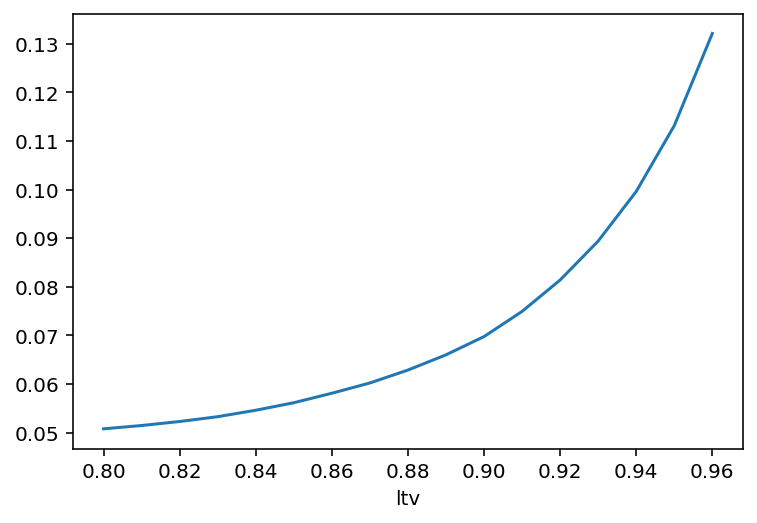

In [13]:
res.plot()